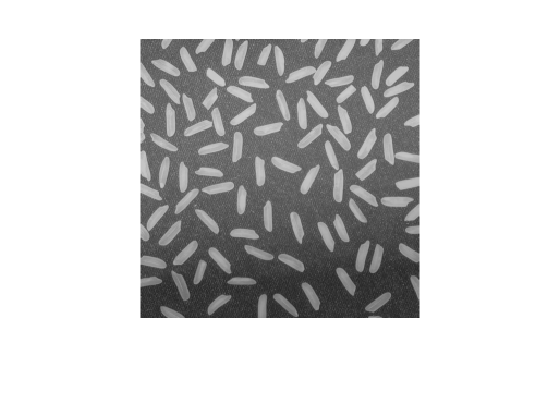

In [1]:
I = imread('rice.png');
imshow(I)

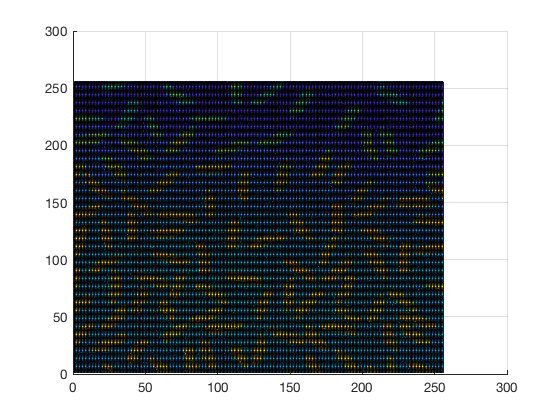

In [2]:
surf(1:size(I,1),1:size(I,2),I)
 view(0,90)

In [3]:
size(I)


ans =

   256   256



In [4]:
I(1:10,1:10)


ans =

  10x10 uint8 matrix

   122    92    95    99   102   107    89    90    95   110
    99    99   102    82   100    89    91    87    86    94
    97   107   103    86    98    92    93    96    96    93
   102   100    99    87    97    89   110    95    93    83
    84   107    98    99    92    94   104    91   104    88
    86   107    93   107    91   109    92   105    91    89
    97   104    90    93    93    96    89   121   100   102
   105   102   110    97   100    93    89   106   102   117
   111    97   100    95   110    98   103   105    93   114
    97    88   114    93    96    87   101    94   102   104



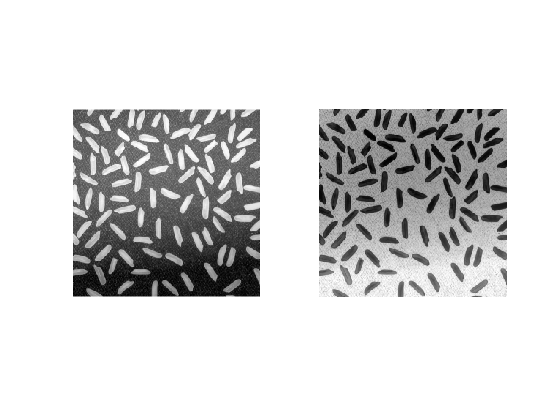

In [5]:
I = im2double(I);
J = 1-I;
subplot(121)
imshow(I,[])
subplot(122)
imshow(J,[])

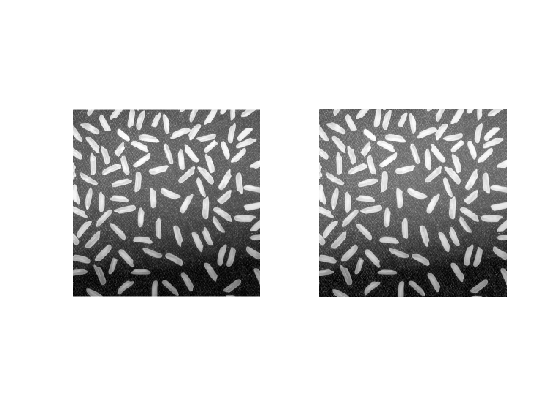

In [6]:
J1 = log(1+I);
subplot(121)
imshow(I,[])
subplot(122)
imshow(J1,[])


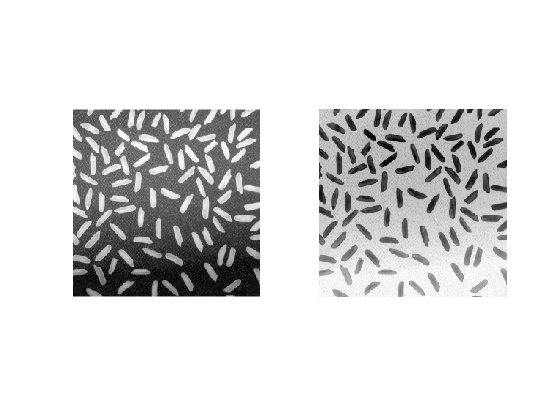

In [7]:
J2 = log(1-I);
subplot(121)
imshow(I,[])
subplot(122)
imshow(J2,[])

In [8]:
%Threshold
meanV = mean(I(:))


meanV =

    0.4363



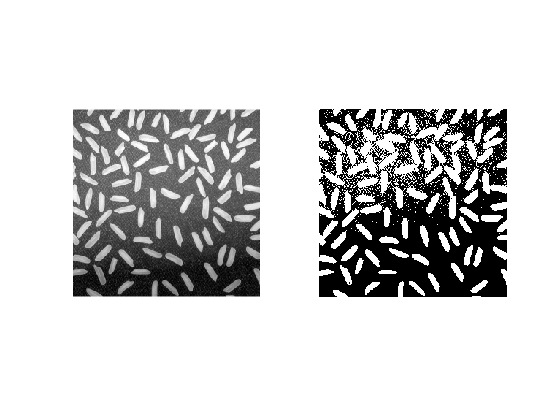

In [9]:
Jt = I;
Jt(I<meanV) = 0;
Jt(I>=meanV) = 1;
subplot(121)
imshow(I,[])
subplot(122)
imshow(Jt,[])

In [10]:
unique(Jt(:))


ans =

     0
     1



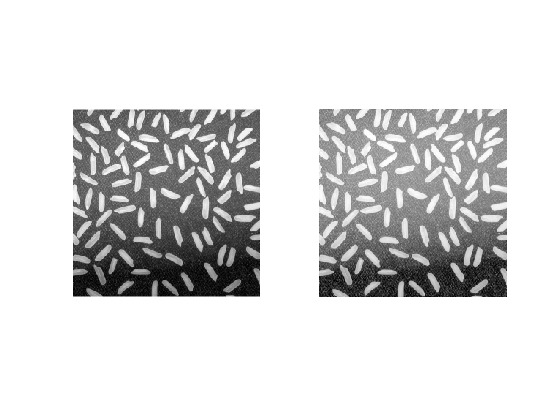

In [11]:
%gamma transform
Jg = I.^(0.04);
subplot(121)
imshow(I,[])
subplot(122)
imshow(Jg,[])

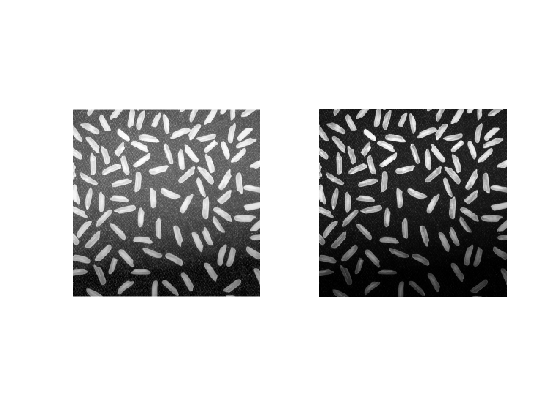

In [12]:
%gamma transform
Jg = I.^(3);
subplot(121)
imshow(I,[])
subplot(122)
imshow(Jg,[])

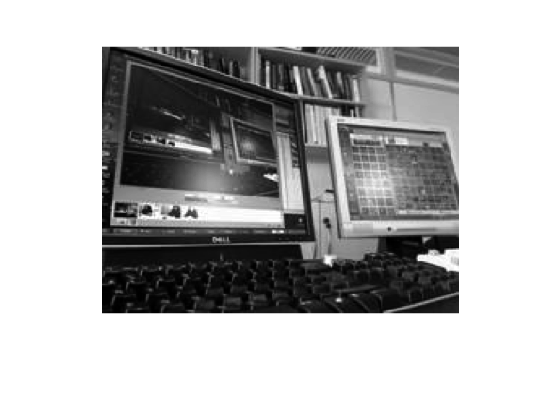

In [13]:
I1 = imread('Picture1.png');
I1 = im2double(I1);
J1 = I1.^(1.5);
imshow(J1,[])

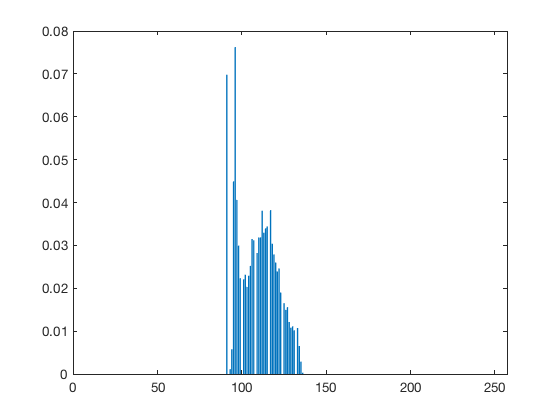

In [1]:
I = imread('Fig0310(b)(washed_out_pollen_image).tif');
[m,n] = size(I);
nbins = 256;%max(I(:))
hist_ori = zeros(1,nbins);
for i = 1:m
  for j = 1:n
    hist_ori(I(i,j)) = hist_ori(I(i,j))+1;
  end
end
hist_ori = hist_ori/sum(hist_ori);
bar(hist_ori)


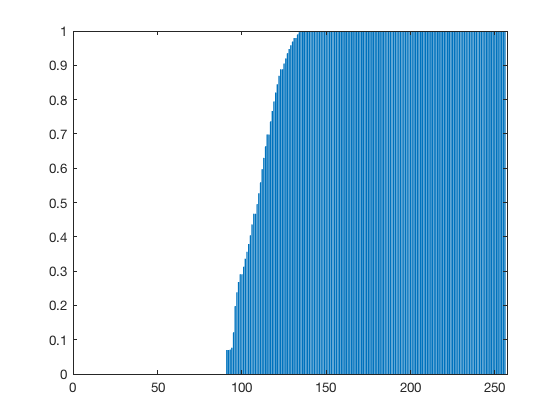

In [5]:
%compute the cumulative histogram
hist_cum = cumsum(hist_ori);

% for i=1:nbins
% hist_cum2(i) = sum(hist_ori(1:i));
% end

figure
bar(hist_cum)
% figure
% bar(hist_cum2-hist_cum)

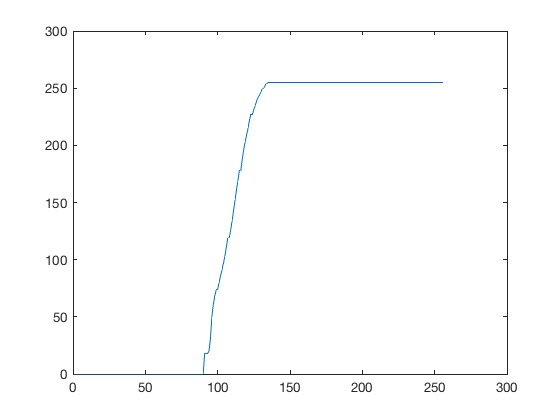

In [16]:

%compute the transform t()
% for i=1:256
% t(i)=floor(255*hist_cum(i)+0.5);
% end
t = floor(255*hist_cum+0.5);
figure
plot(t)




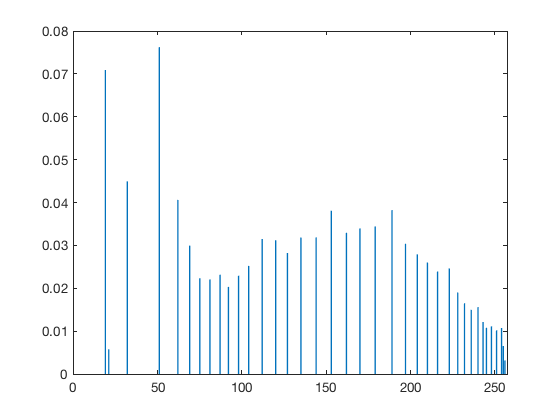

In [17]:

%compute the transformed histogram
hist_trans = zeros(1,nbins);
for i=1:256
    hist_trans(t(i)+1) = hist_trans(t(i)+1) + hist_ori(i);
end
figure
bar(hist_trans)




Elapsed time is 0.007849 seconds.


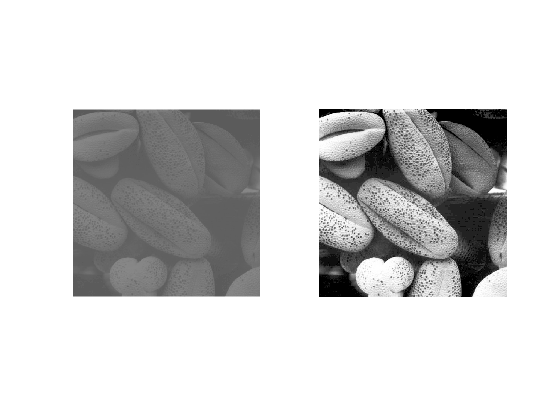

In [18]:
%compute the enhanced image
tic
% for i=1:m
%     for j=1:n
%       I_enhanced(i,j)=t(I(i,j));
%     end
% end

I_enhanced = t(I);
toc
figure
subplot(121)
imshow(I)
subplot(122)
imshow(I_enhanced,[])



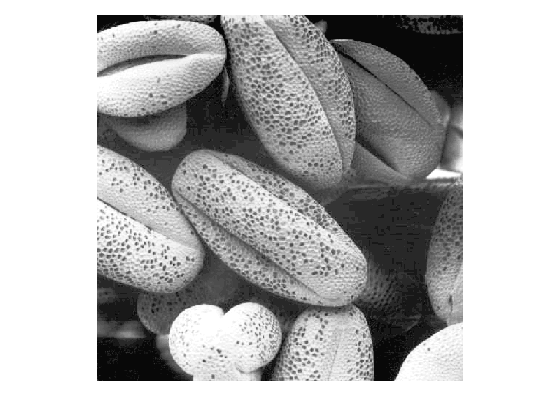

In [3]:
I2 = histeq(I);
imshow(I2)

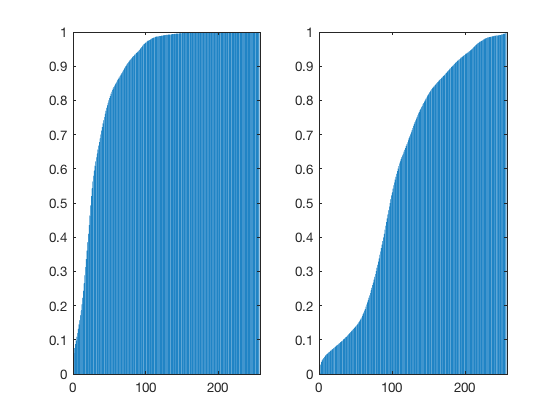

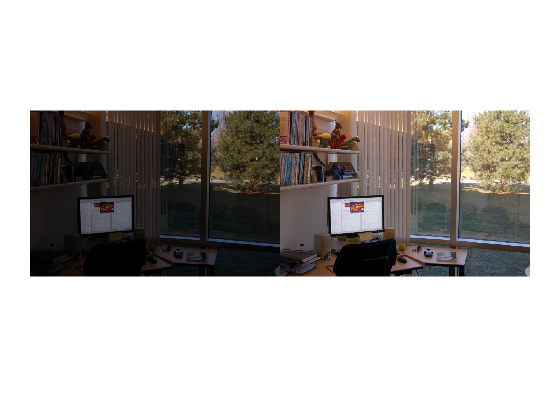

In [7]:
%histogram specification(matching)

I = imread('office_2.jpg');
ref = imread('office_4.jpg');
montage([I ref])
%matlab built-in function
%K = imhistmatch(I,ref);

% %compute the histogram of reference image
% hist_ref = imhist(ref);
% %histogram equalization according to the ref's hist
% K = histeq(I,hist_ref);

% step-by-step 
hist_I = imhist(I);
hist_ref = imhist(ref);

cum_hist_I = cumsum(hist_I)/numel(I);
cum_hist_ref = cumsum(hist_ref)/numel(ref);

figure
subplot(121)
bar(cum_hist_I)
subplot(122)
bar(cum_hist_ref)


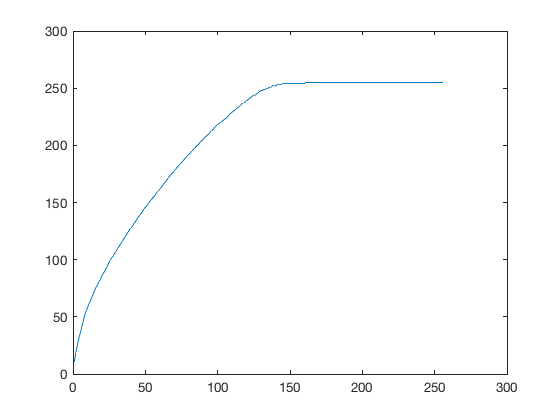

In [20]:

map = zeros(1,256);
for i=1:length(cum_hist_I)
   [tmp,ind] = min(abs(cum_hist_I(i) - cum_hist_ref));
   map(i) = ind -1;
end
figure
plot(map)



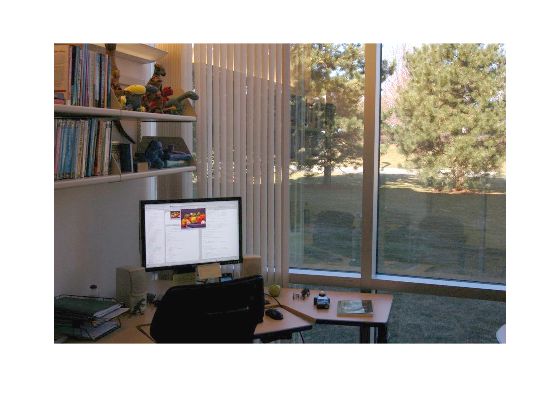

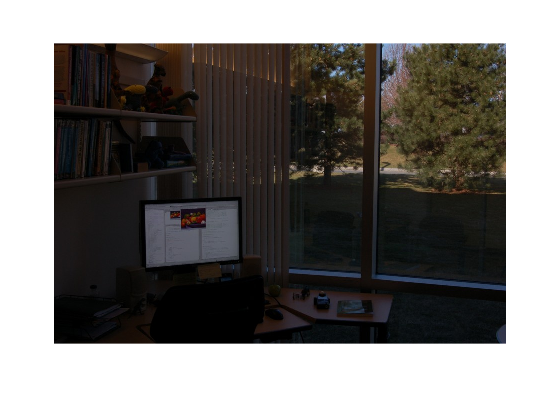

In [21]:
K = map(double(I) + 1);

figure
imshow(I)
% figure
% imshow(ref)
figure
imshow(uint8(K))



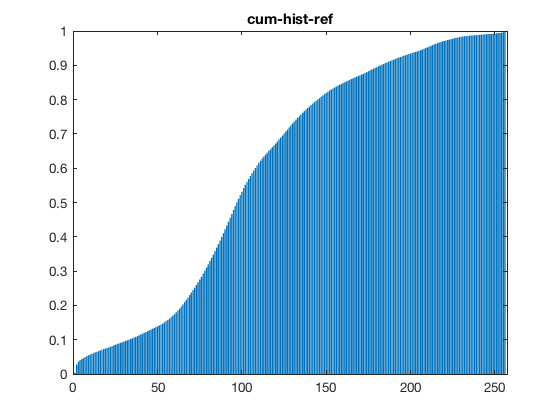

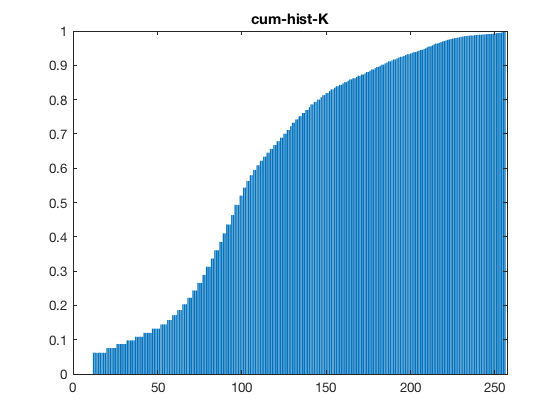

In [30]:
hist_K = imhist(uint8(K));
cum_hist_K = cumsum(hist_K)/numel(K);
bar(cum_hist_K)
title('cum-hist-K')
figure
bar(cum_hist_ref)
title('cum-hist-ref')

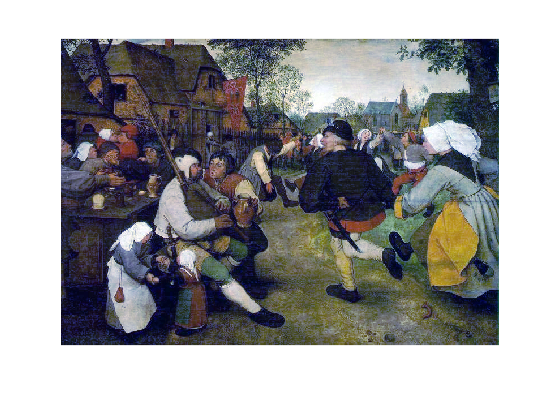

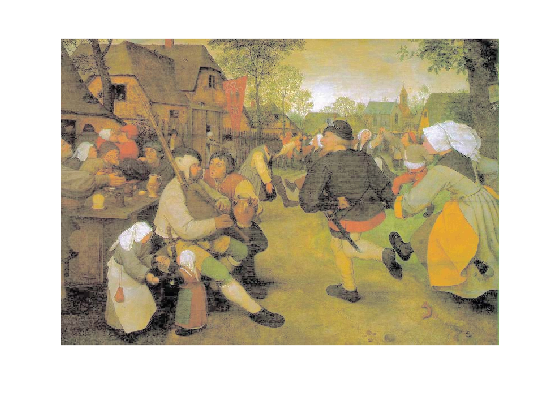

In [10]:

I = imread('s3.jpg');
ref = imread('s5.jpg');

I_yuv = rgb2ycbcr(I);
ref_yuv = rgb2ycbcr(ref);
I_yuv(:,:,1) = imhistmatch(I_yuv(:,:,1),ref_yuv(:,:,1));
I2 = ycbcr2rgb(uint8(I_yuv));
figure
imshow(I2)

I1 = I;
I1(:,:,2) = imhistmatch(I(:,:,2),I(:,:,1));
I1(:,:,3) = imhistmatch(I(:,:,3),I(:,:,1));
figure
imshow(I1)






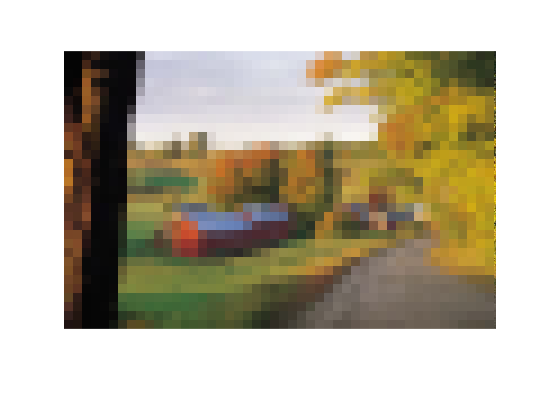

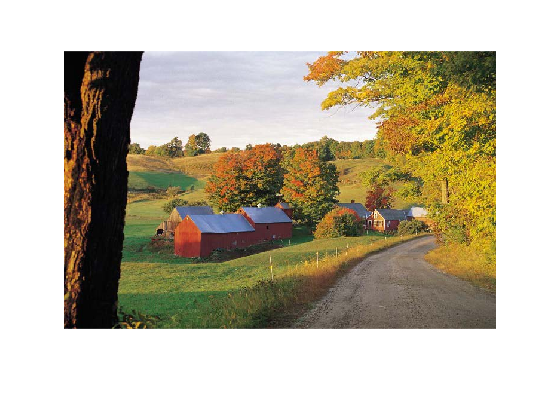

In [22]:
I = imread('cys_topic3_Editing.jpg');
imshow(I)
[m,n,o] = size(I);

J = I;
step = 15;
for i = 1:m/step
for j = 1:n/step
    J((i-1)*step+1:i*step, (j-1)*step+1:j*step, 1) = mean(mean(I((i-1)*step+1:i*step,(j-1)*step+1:j*step,1)));
    J((i-1)*step+1:i*step, (j-1)*step+1:j*step, 2) = mean(mean(I((i-1)*step+1:i*step,(j-1)*step+1:j*step,2)));
    J((i-1)*step+1:i*step, (j-1)*step+1:j*step, 3) = mean(mean(I((i-1)*step+1:i*step,(j-1)*step+1:j*step,3)));
end
end
figure
imshow(J)


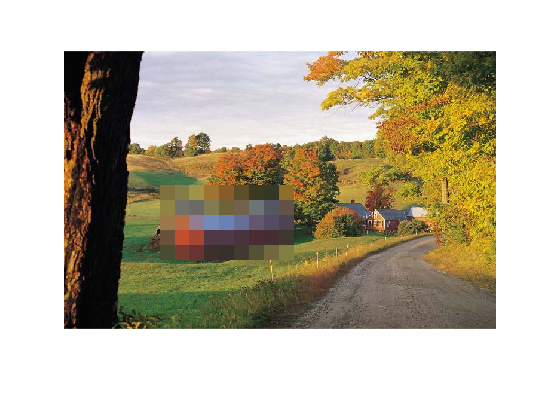

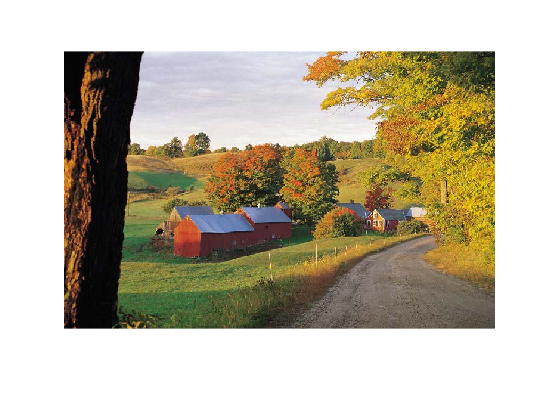

In [30]:
I = imread('cys_topic3_Editing.jpg');
imshow(I)
[m,n,o] = size(I);
[Ic,s] = imcrop(I);
s = floor(s);

J = I;
step = 25;
for i = 1:s(4)/step
for j = 1:s(3)/step
    J((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 1) = mean(mean(I((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 1)));
    J((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 2) = mean(mean(I((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 2)));
    J((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 3) = mean(mean(I((i-1)*step+s(2)+1:i*step+s(2), (j-1)*step+s(1)+1:j*step+s(1), 3)));
end
end
figure
imshow(J)

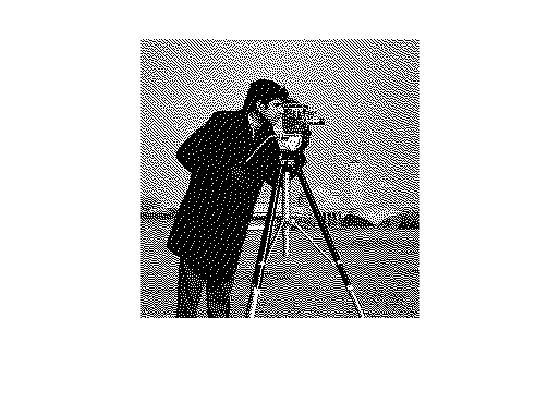

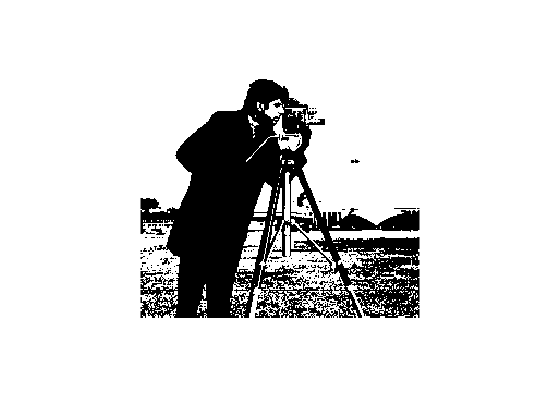

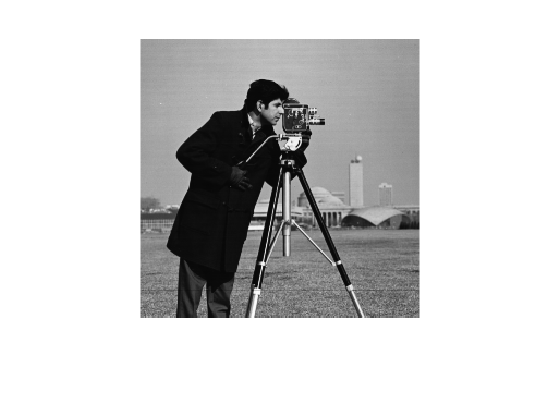

In [39]:
%dither
I = imread('cameraman.tif');
figure,imshow(I);
BW1 = im2bw(I,0.5);
figure, imshow(BW1);
BW2 = dither(I);
figure, imshow(BW2);

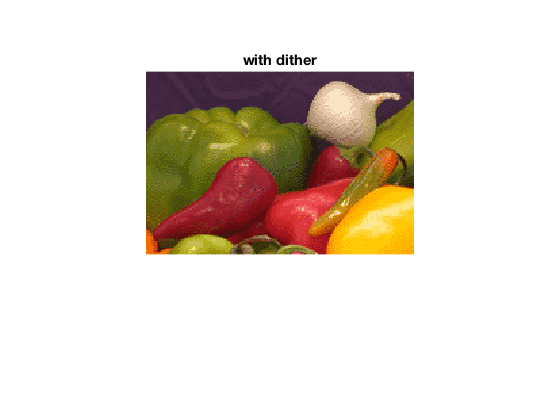

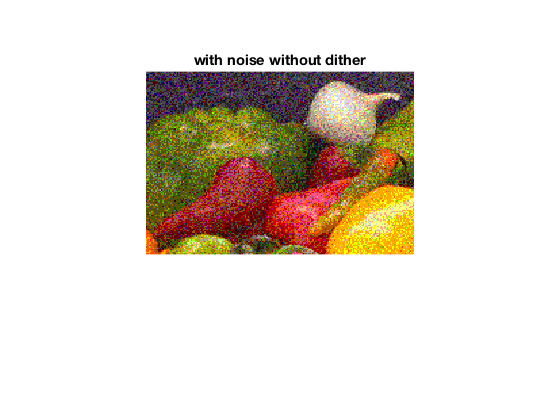

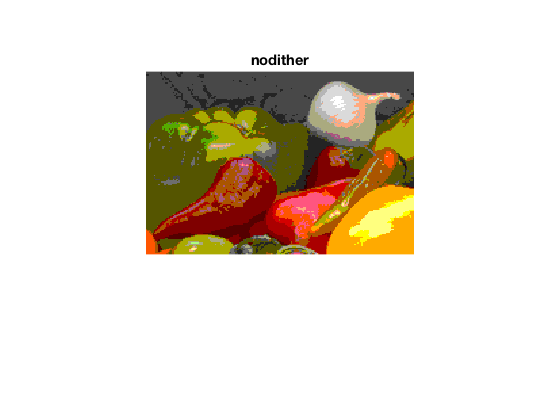

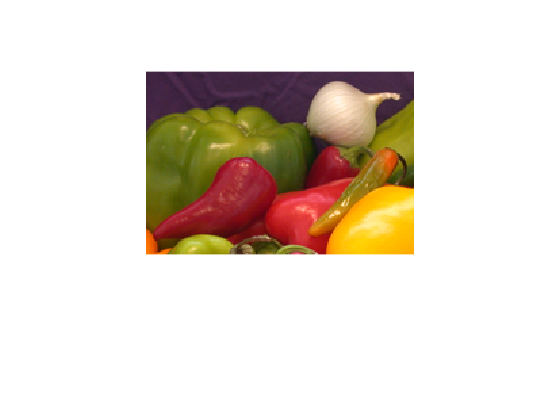

In [41]:
rgb=imread('onion.png');
height=size(rgb,1);width=size(rgb,2);
figure,imshow(rgb);
map=colormap(colorcube(64));
BWrgb= rgb2ind(rgb,map,'nodither');
figure,imshow(BWrgb,map);
title('nodither')
noise=30.0*randn(height,width,3);
rgbnoise=uint8(double(rgb)+noise);
BWrgbnoise= rgb2ind(rgbnoise,map,'nodither');
figure,imshow(BWrgbnoise,map);
title('with noise without dither')
[X_dither,map]=rgb2ind(rgb,64,'dither');
figure, imshow(X_dither,map);
title('with dither')

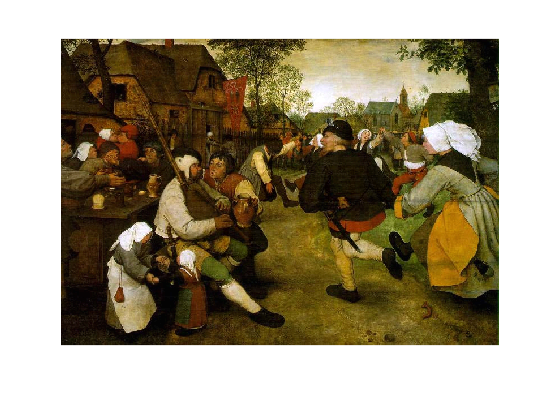

In [31]:
%watermark

I1 = imread('s3.jpg');
I2 = imread('s2.jpg');

I11 = bitshift(I1,-2);
I11 = bitshift(I11,2);

I22 = bitshift(I2,-6);

I3 = bitor(I11,I22);
figure
imshow(I3)

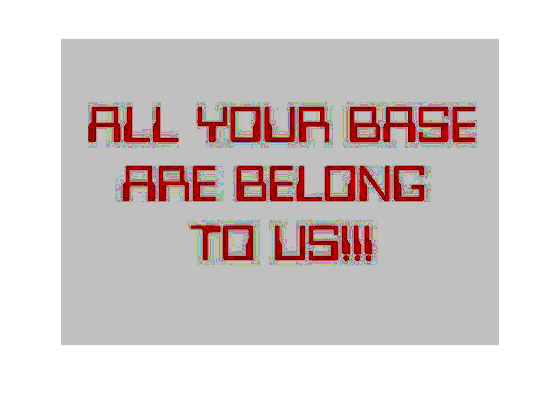

In [32]:
I31 = bitshift(I3,6);
figure
imshow(I31)

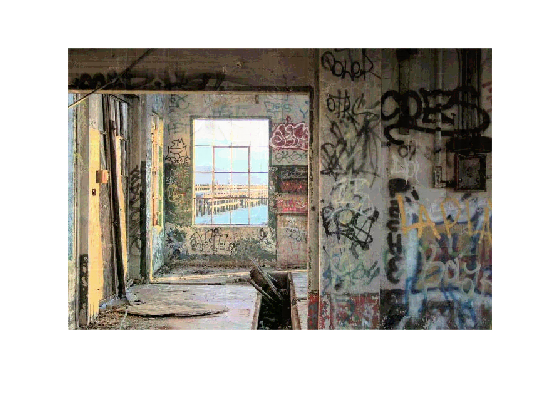

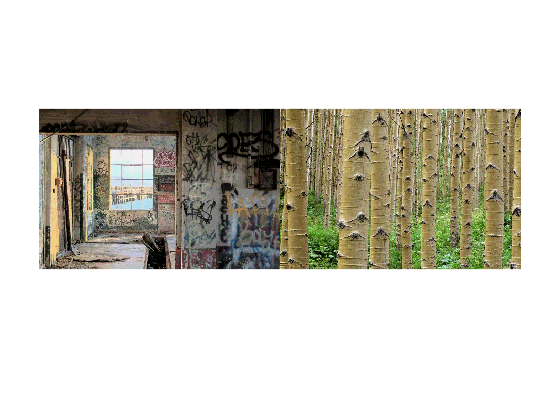

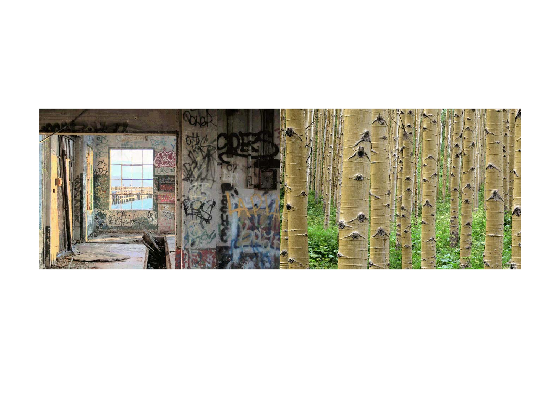

In [38]:

I4 = imread('s4.jpg');
I5 = imread('s5.jpg');
montage([I4 I5])
I41 = bitshift(I4,-4);
I41 = bitshift(I41,4);
I51 = bitshift(I5,-4);
% figure
% montage([I41 bitshift(I51,4)])

I6 = bitor(I41,I51);
figure
imshow(I6)

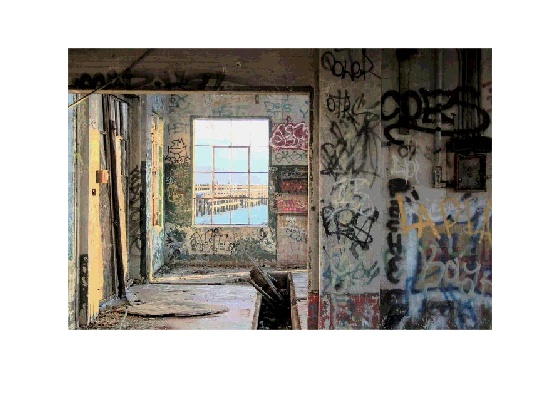

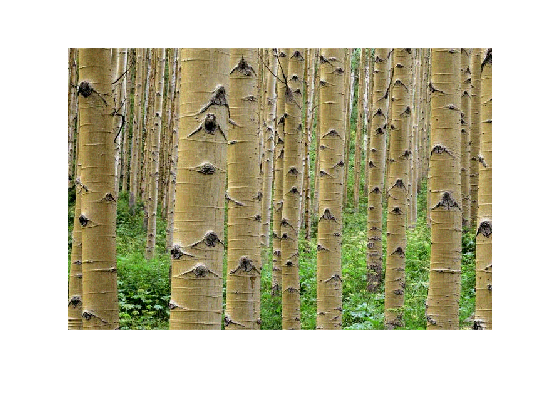

In [34]:
I61 = bitshift(I6,4);
figure
imshow(I61)
I62 = bitshift(I6,-4);
I62 = bitshift(I62,4);
figure
imshow(I62)